# Tutorial Goal

This tutorial aims to show some example of **data analysis and visualization**
from a set of trace events collected trace. These analysis are mainly supported
by **TRAPpy** and other standard **PANDAs** APIs.

In [317]:
import logging
from conf import LisaLogging
LisaLogging.setup()

# Trace Parsing

In [318]:
# Events we are interested to collect from the trace
my_events = [
    "sched_switch",
    "sched_wakeup",
    "sched_contrib_scale_f",
    "sched_load_avg_cpu",
    "sched_load_avg_task",
    "sched_tune_tasks_update",
    "sched_boost_cpu",
    "sched_boost_task",
    "sched_energy_diff",
    "sched_overutilized",
    "cpu_frequency",
    "cpu_capacity"
]

# Let's use an example trace
trace_file = './example_results/trace.dat'

In [319]:
# Use TRAPpy support to convert a trace into a PANDAs DataFrame
import trappy

ftrace = trappy.FTrace(
    name="PandasExamples",
    path=trace_file,
    scope='custom',
    events=my_events,
    window=(0,None))

## Trace visualization

In [320]:
# NOTE: The interactive trace visualization is available only if you run
#       the workload to generate a new trace-file
trappy.plotter.plot_trace(ftrace)

## Accessing DataFrame tables

In [321]:
# Let's have a look at the generated file
!ls -la example_results

total 461132
drwxrwxr-x  4 derkling derkling      4096 Mar  3 10:51 .
drwxrwxr-x 14 derkling derkling      4096 Mar  2 16:24 ..
-rw-rw-r--  1 derkling derkling      9646 Mar  2 16:24 01_IPythonNotebooksUsage.ipynb
-rw-rw-r--  1 derkling derkling     69766 Mar  2 16:59 02_TestEnvUsage.ipynb
-rw-rw-r--  1 derkling derkling     49598 Mar  2 17:20 03_WlGenUsage.ipynb
-rw-rw-r--  1 derkling derkling     18062 Mar  2 17:20 04_ExecutorUsage.ipynb
-rw-rw-r--  1 derkling derkling    170388 Mar  3 10:51 05_TrappyUsage.ipynb
-rw-rw-r--  1 derkling derkling    319096 Mar  3 10:46 06_TraceAnalysis.ipynb
drwxrwxr-x  2 derkling derkling      4096 Mar  3 10:36 example_results
drwxr-xr-x  2 derkling derkling      4096 Mar  3 08:56 .ipynb_checkpoints
-rw-rw-r--  1 derkling derkling 241050436 Mar  2 17:23 trace.raw.txt
-rw-rw-r--  1 derkling derkling 230468272 Mar  2 17:23 trace.txt


Notice that the binary trace has been used to generate both textual
(i.e. trace.txt) trace as well as a raw trace (trace.raw.txt).

In [322]:
logging.info("Example of (formatted) 'sched_switch' event:")
with open('./example_results/trace.txt', 'r') as fh:
    for line in fh:
        if line.find('sched_switch') == -1:
            continue
        print line
        break

10:51:52  INFO    : Example of (formatted) 'sched_switch' event:


           <...>-20278 [001]   713.575552: sched_switch:         trace-cmd:20278 [120] x ==> swapper/1:0 [120]



In [323]:
logging.info("Example of (raw) 'sched_switch' event:")
with open('./example_results/trace.raw.txt', 'r') as fh:
    for line in fh:
        if line.find('sched_switch') == -1:
            continue
        print line
        break

10:51:52  INFO    : Example of (raw) 'sched_switch' event:


           <...>-20278 [001]   713.575552: sched_switch:          prev_comm=trace-cmd prev_pid=20278 prev_prio=120 prev_state=64 next_comm=swapper/1 next_pid=0 next_prio=120



Every event correspond to a "table" which is exposed as an attribute of the
TRAPpy::FTtrace object we created by parsing the trace.

We can use **TRAPpy::FTrace::class_definitions**, which is a dictionary tracking all the collected tables.

In [324]:
logging.info("List of events identified in the trace:")
for event in ftrace.class_definitions.keys():
    logging.info("   %s", event)

10:51:53  INFO    : List of events identified in the trace:
10:51:53  INFO    :    sched_load_avg_task
10:51:53  INFO    :    cpu_frequency
10:51:53  INFO    :    cpu_capacity
10:51:53  INFO    :    sched_load_avg_cpu
10:51:53  INFO    :    sched_boost_cpu
10:51:53  INFO    :    sched_tune_tasks_update
10:51:53  INFO    :    sched_boost_task
10:51:53  INFO    :    sched_overutilized
10:51:53  INFO    :    sched_energy_diff
10:51:53  INFO    :    sched_switch
10:51:53  INFO    :    sched_contrib_scale_f
10:51:53  INFO    :    sched_wakeup


In [325]:
# Let's get a reference to the PANDAs DataFrame corresponding to the
# "sched_switch" events
logging.info("The 'sched_switch' events are collected into this DataFrame:")
df = ftrace.sched_switch.data_frame
df#.head(2)

10:51:53  INFO    : The 'sched_switch' events are collected into this DataFrame:


,__comm,__cpu,__pid,next_comm,next_pid,next_prio,prev_comm,prev_pid,prev_prio,prev_state
Time,,,,,,,,,,
0.000272,<...>,1,20278,swapper/1,0,120,trace-cmd,20278,120,64
0.000348,<idle>,0,0,sh,20277,120,swapper/0,0,120,0
0.001321,<...>,0,20277,sudo,20276,120,sh,20277,120,64
0.001357,<idle>,1,0,rcu_preempt,7,120,swapper/1,0,120,0
0.001458,rcu_preempt,1,7,swapper/1,0,120,rcu_preempt,7,120,1
0.005202,<...>,0,20276,ksdioirqd/mmc2,1364,98,sudo,20276,120,1024
0.005349,ksdioirqd/mmc2,0,1364,rsyslogd,394,120,ksdioirqd/mmc2,1364,98,1
0.005464,<idle>,1,0,ksoftirqd/1,14,120,swapper/1,0,120,0
0.005528,ksoftirqd/1,1,14,rcu_preempt,7,120,ksoftirqd/1,14,120,1


**NOTE:** We can use **head()** to report only a limited number of events

In [326]:
# All events parsed in the trace have an associated DataFrame
logging.info("This is the DataFrame for 'cpu_frequency' events:")
df = ftrace.cpu_frequency.data_frame
df.head(2)

10:51:53  INFO    : This is the DataFrame for 'cpu_frequency' events:


,__comm,__cpu,__pid,cpu,frequency
Time,,,,,
0.661132,kschedfreq:2,2,119,2,1807000
0.661136,kschedfreq:2,2,119,3,1807000


# Common DataFrame Operations

On DataFrames is possible to execute a number of different operations.
Most commonly we are interested in:
- focus only on certain columns
- filtering events based on different conditions
- joining two or more DataFrames
- resuming statistical data of a DataFrame

## Columns selection

In [330]:
df = ftrace.sched_switch.data_frame
df.head(2)

,__comm,__cpu,__pid,next_comm,next_pid,next_prio,prev_comm,prev_pid,prev_prio,prev_state
Time,,,,,,,,,,
0.000272,<...>,1,20278,swapper/1,0,120,trace-cmd,20278,120,64
0.000348,<idle>,0,0,sh,20277,120,swapper/0,0,120,0


In [331]:
# The "ix" operator allow to select ranges of [rows:columns]
df = df.ix[:,'next_comm':'prev_state']
df.head(2)

,next_comm,next_pid,next_prio,prev_comm,prev_pid,prev_prio,prev_state
Time,,,,,,,
0.000272,swapper/1,0,120,trace-cmd,20278,120,64
0.000348,sh,20277,120,swapper/0,0,120,0


In [332]:
# We can also filter by listing the columns we are interested into
tasks = df[['next_pid', 'next_comm']]
logging.info("Found %d sched_switch events: ", len(tasks))
tasks.head(2)

10:52:30  INFO    : Found 130884 sched_switch events: 


,next_pid,next_comm
Time,,
0.000272,0,swapper/1
0.000348,20277,sh


In [333]:
# Create a map of {PID: TaskName}
pid_to_task = {int(task[0]): task[1] for task in tasks.drop_duplicates().values}
logging.info("The trace has %s unique PIDs", len(pid_to_task))
pid_to_task

10:52:33  INFO    : The trace has 855 unique PIDs


{0: 'swapper/2',
 1: 'init',
 2: 'kthreadd',
 3: 'ksoftirqd/0',
 6: 'kworker/u8:0',
 7: 'rcu_preempt',
 8: 'rcu_sched',
 10: 'migration/0',
 11: 'watchdog/0',
 12: 'watchdog/1',
 13: 'migration/1',
 14: 'ksoftirqd/1',
 17: 'watchdog/2',
 18: 'migration/2',
 19: 'ksoftirqd/2',
 22: 'watchdog/3',
 23: 'migration/3',
 24: 'ksoftirqd/3',
 31: 'khungtaskd',
 66: 'fsnotify_mark',
 83: 'spi32766',
 88: 'kworker/1:1',
 89: 'kworker/0:1',
 110: 'kworker/u8:3',
 114: 'kworker/0:2',
 118: 'kschedfreq:0',
 119: 'kschedfreq:2',
 122: 'mmcqd/0',
 123: 'mmcqd/0boot0',
 124: 'mmcqd/0boot1',
 125: 'mmcqd/0rpmb',
 128: 'pvr_defer_free',
 129: 'pvr_device_wdg',
 134: 'kworker/3:2',
 136: 'kworker/0:1H',
 138: 'kworker/1:1H',
 166: 'udevd',
 209: 'jbd2/mmcblk0p1-',
 239: 'loop0',
 260: 'jbd2/dm-1-8',
 264: 'kworker/2:1H',
 286: 'kworker/3:1H',
 369: 'rsyslogd',
 380: 'rs:main Q:Reg',
 394: 'rsyslogd',
 395: 'rsyslogd',
 398: 'dbus-daemon',
 489: 'wpa_supplicant',
 492: 'daisydog',
 606: 'tcsd',
 615: 'cha

## Events grouping

In [118]:
# Group events by "PID" and compute 
most_switching = df.groupby('next_pid').describe(include=['object'])
most_switching.head()

next_comm prev_comm
next_pid                            
0        count       20400     20400
         unique          4       158
         top     swapper/1    chrome
         freq         8442      5964
1        count         372       372

In [119]:
most_switching = most_switching.unstack()
most_switching.head()

next_comm                            prev_comm                      \
             count unique           top  freq     count unique          top   
next_pid                                                                      
0            20400      4     swapper/1  8442     20400    158       chrome   
1              372      1          init   372       372     33  dbus-daemon   
2                5      1      kthreadd     5         5      5    swapper/1   
3              761      1   ksoftirqd/0   761       761     36  rcu_preempt   
6             2275      1  kworker/u8:0  2275      2275     64       chrome   

                
          freq  
next_pid        
0         5964  
1           90  
2            1  
3          246  
6          475

In [124]:
most_switching = most_switching['next_comm']\
                 .sort_values(by=['count'], ascending=False)
most_switching.head()

,count,unique,top,freq
next_pid,,,,
0,20400,4,swapper/1,8442
20552,9224,2,Chrome_IOThread,9223
20527,8309,2,chrome,8307
20560,6898,3,chrome,6797
7,5516,1,rcu_preempt,5516


In [231]:
most_switching_pid  = most_switching.index[1]
most_switching_task = most_switching.values[1][2]
task_name = "{}:{}".format(most_switching_pid, most_switching_task)
logging.info("The second most swithing task is: [%s]", task_name)

07:08:50  INFO    : The second most swithing task is: [20552:Chrome_IOThread]


## Filtering by column value

In [188]:
# Lets use the previous information to filter values of another DataFrame
# Here we use the events reporting the task utilization signal
df = ftrace.sched_load_avg_task.data_frame.ix[:,'comm':'util_sum']
logging.info("Total events: %d", len(df))
df.head()

06:45:37  INFO    : Total events: 220234


,comm,cpu,load_avg,load_sum,period_contrib,pid,util_avg,util_sum
Time,,,,,,,,
0.000014,trace-cmd,1,58,2811439,916,20278,33,1601714
0.000229,trace-cmd,1,59,2820191,111,20278,33,1612418
0.000334,sh,0,0,0,957,20277,0,0
0.000982,sh,0,5,285169,710,20277,3,164585
0.001178,sh,0,5,355825,903,20277,3,205364


In [189]:
# Select only events for the task of interest
select = (df.pid == most_switching_pid)

task_events = df[select]
logging.info("Selected events: %d", len(task_events))
task_events.head()

06:45:37  INFO    : Selected events: 19129


,comm,cpu,load_avg,load_sum,period_contrib,pid,util_avg,util_sum
Time,,,,,,,,
10.277545,chrome,3,5,279939,876,20552,0,0
10.278066,Chrome_IOThread,3,8,421520,374,20552,3,147580
10.278226,Chrome_IOThread,3,8,421520,501,20552,3,147580
10.279379,Chrome_IOThread,3,15,739012,629,20552,9,470942
10.279542,Chrome_IOThread,3,15,739012,765,20552,9,470942


In [194]:
# We can also compose a query using multiple conditions
select = (((task_events.cpu != 1) & (task_events.cpu != 2)) & ~(task_events.util_avg < 450))

task_events = task_events[select]
logging.info("Selected events: %d", len(task_events))
task_events.head()

06:47:30  INFO    : Selected events: 2007


,comm,cpu,load_avg,load_sum,period_contrib,pid,util_avg,util_sum
Time,,,,,,,,
17.112905,Chrome_IOThread,3,989,47260557,91,20552,452,21592551
17.113017,Chrome_IOThread,3,989,47333261,196,20552,452,21592551
17.113273,Chrome_IOThread,3,989,47571853,429,20552,452,21831143
17.113552,Chrome_IOThread,3,989,47866765,717,20552,452,21831143
17.114018,Chrome_IOThread,3,990,47295142,143,20552,456,21817410


## Row selection

In [198]:
# Row selection is also possible, which in our case corresponds to limiting 
# the events on a specified time frame
task_events.ix[21.1:22.9,].head()

,comm,cpu,load_avg,load_sum,period_contrib,pid,util_avg,util_sum
Time,,,,,,,,
21.983876,Chrome_IOThread,3,860,41072776,117,20552,452,21610419
21.983908,Chrome_IOThread,3,860,41109640,153,20552,452,21610419
21.983928,Chrome_IOThread,3,860,41129096,172,20552,452,21629875
21.983987,Chrome_IOThread,3,860,41188488,230,20552,452,21629875
21.984067,Chrome_IOThread,3,860,41263240,303,20552,452,21704627


## DataFrame Merging

In [218]:
# Let's make use of yet another DataFrame, let's look at the frequencies
frequencies = ftrace.cpu_frequency.data_frame

select = (frequencies.cpu == 0)
frequencies = frequencies.ix[21.1:22.9,'cpu':'frequency'][select]
logging.info("Selected events: %d", len(frequencies))
frequencies.head()

06:59:46  INFO    : Selected events: 17


,cpu,frequency
Time,,
21.215426,0,1001000
21.265745,0,1404000
21.412728,0,507000
21.465761,0,1404000
21.541466,0,507000


In [222]:
# Let's merge the task signal frame with the CPUs frequencies
task_util_and_freq = task_events.join(
    frequencies,
    how='outer',
    lsuffix='lx_')#[['util_avg', 'frequency']]
logging.info("Selected events: %d", len(task_util_and_freq))
task_util_and_freq.tail()

06:59:59  INFO    : Selected events: 2024


,comm,cpulx_,load_avg,load_sum,period_contrib,pid,util_avg,util_sum,cpu,frequency
Time,,,,,,,,,,
22.701783,Chrome_IOThread,3,893,42702053,124,20552,457,21865198,NaN,NaN
22.701807,Chrome_IOThread,3,893,42727653,149,20552,457,21865198,NaN,NaN
22.701824,Chrome_IOThread,3,893,42743013,164,20552,457,21880558,NaN,NaN
22.768356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1183000
22.818657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1404000


In [223]:
# The new table has the union of events from the two original tables
len(task_events) + len(frequencies)

2024

In [224]:
# Let's propagate missing columns values...
task_util_and_freq = task_util_and_freq.fillna(method='ffill')
task_util_and_freq.tail()

,comm,cpulx_,load_avg,load_sum,period_contrib,pid,util_avg,util_sum,cpu,frequency
Time,,,,,,,,,,
22.701783,Chrome_IOThread,3,893,42702053,124,20552,457,21865198,0,1404000
22.701807,Chrome_IOThread,3,893,42727653,149,20552,457,21865198,0,1404000
22.701824,Chrome_IOThread,3,893,42743013,164,20552,457,21880558,0,1404000
22.768356,Chrome_IOThread,3,893,42743013,164,20552,457,21880558,0,1183000
22.818657,Chrome_IOThread,3,893,42743013,164,20552,457,21880558,0,1404000


In [226]:
# NOTE: missing values at the beginning can be fixe as well
#       ...but that behind that demo!
# LISA has a set of methods which provides a complete and realiable solutions
# to do this kind of compositions on data frames

# Plotting

## Using pylab

In [227]:
# Enable generation of Notebook emebedded plots
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


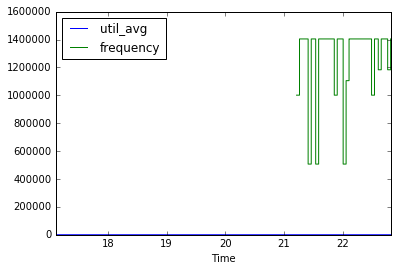

In [229]:
task_util_and_freq[['util_avg', 'frequency']].plot(drawstyle="steps-post")

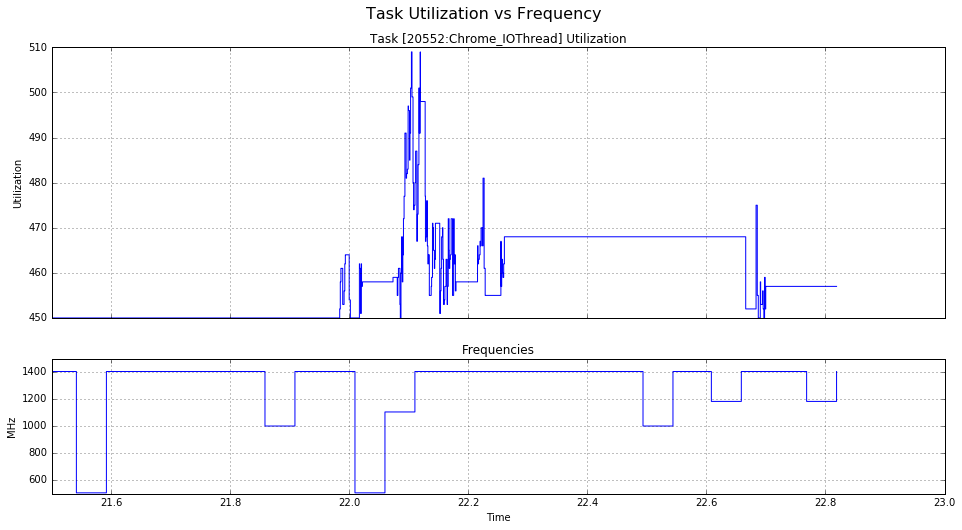

In [260]:
import matplotlib.gridspec as gridspec

t_min = 21.5
t_max = 23.0

gs = gridspec.GridSpec(2, 1, height_ratios=[2,1]);

plt.figure(figsize=(16, 8));
plt.suptitle("Task Utilization vs Frequency",
             y=.97, fontsize=16, horizontalalignment='center');

# Plot Utilization
data = task_util_and_freq['util_avg']
axes = plt.subplot(gs[0,0]);
data.plot(ax=axes, drawstyle='steps-post');
axes.set_title('Task [{}] Utilization'.format(task_name));
axes.set_ylabel('Utilization')
axes.set_xlim(t_min, t_max);
axes.grid(True);
axes.set_xticklabels([])
axes.set_xlabel('')


# Plot Frequencies
data = task_util_and_freq['frequency']/1000
axes = plt.subplot(gs[1,0]);
data.plot(ax=axes, drawstyle='steps-post');
axes.set_title('Frequencies');
axes.set_ylabel('MHz')
axes.set_xlim(t_min, t_max);
axes.grid(True);

Plots can be much better with just a little bit of setup and using the proper APIs.<br>
That's why **LISA** aims at providing a **predefined set of plot functions** for commonly used analysis.

## Using TRAPpy LinePlotter

In [306]:
# Consider the data frame for the frequency switching events
logging.info("Table for 'cpu_frequency' events:")
ftrace.cpu_frequency.data_frame.head(1)

08:01:48  INFO    : Table for 'cpu_frequency' events:


,__comm,__cpu,__pid,cpu,frequency,start,delta
Time,,,,,,,
0.661132,kschedfreq:2,2,119,2,1807000,0.661132,0.000004


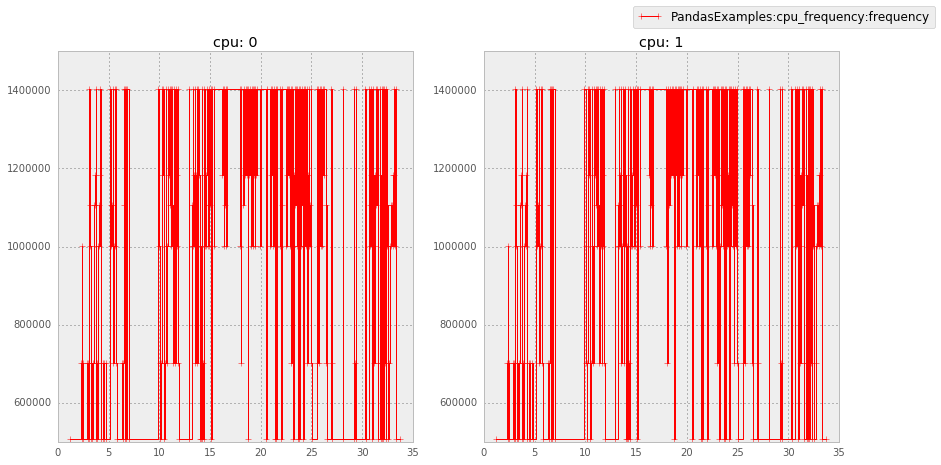

In [309]:
# It is possible to mix in the same plot multiple events

# The LinePlot module requires to specify a list of signals to plot.
# Each signal is defined as:
#       <event>:<column>
# where:
#  <event>   is one of the events collected from the trace by the FTrace object
#  <column>  is one of the column of the previously defined event
my_signals = [
    'cpu_frequency:frequency',
]

# These two paramatere are passed to the LinePlot call as long with the
# TRAPpy FTrace object
trappy.LinePlot(
    
    # FTrace object
    ftrace,
    
    # Signals to be plotted
    signals=my_signals,
    
    # Generate one plot for each value of the specified column
    pivot='cpu',
    
    # Generate only plots which satisfy these filters
    filters = {
        # Column
        # |     Values
        # |     |
        'cpu' : [0, 1]
    },
    
    # Formatting style
    drawstyle='steps-post',
    marker = '+'

).view()

## Using TRAPpy Interactive LinePlotter

In [298]:
# We can also produce interacive plots
trappy.ILinePlot(
    ftrace,                         # TRAPpy RUN object
    signals=[
      'cpu_frequency:frequency'
    ],
    drawstyle='steps-post',
    per_line=1,
#     sync_zoom=True,
#     group='UtilVsFrequency',
    marker = '+').view()

trappy.ILinePlot(
    ftrace,                         # TRAPpy RUN object
    signals=[
      'sched_load_avg_task:util_avg'
    ],
    filters={
        'pid': [most_switching_pid]
    },
    drawstyle='steps-post',
    per_line=1,
#     sync_zoom=True,
#     group='UtilVsFrequency',
    marker = '+').view()

""
""


""
""


You can find much more exaples of plotting in TRAPpy on the example
notebook available on the GitHub:<br>
    https://github.com/ARM-software/trappy/blob/master/doc/Plotter.ipynb

## Data aggregation and analysis

In [274]:
df = ftrace.cpu_frequency.data_frame
df.head()

,__comm,__cpu,__pid,cpu,frequency,start,delta
Time,,,,,,,
0.661132,kschedfreq:2,2,119,2,1807000,0.661132,0.000004
0.661136,kschedfreq:2,2,119,3,1807000,0.661136,0.051760
0.712896,kschedfreq:2,2,119,2,507000,0.712896,0.000009
0.712905,kschedfreq:2,2,119,3,507000,0.712905,0.473305
1.186210,sh,0,20289,0,507000,1.186210,0.000252


In [275]:
# Lets compute the residency on each OPP
df.loc[:,'start'] = df.index
df.loc[:,'delta'] = (df['start'] - df['start'].shift()).fillna(0).shift(-1)
df.head()

,__comm,__cpu,__pid,cpu,frequency,start,delta
Time,,,,,,,
0.661132,kschedfreq:2,2,119,2,1807000,0.661132,0.000004
0.661136,kschedfreq:2,2,119,3,1807000,0.661136,0.051760
0.712896,kschedfreq:2,2,119,2,507000,0.712896,0.000009
0.712905,kschedfreq:2,2,119,3,507000,0.712905,0.473305
1.186210,sh,0,20289,0,507000,1.186210,0.000252


In [276]:
import pandas as pd

# Now we can get group by frequency and sum the partional residency times
freq_residencies = df.groupby('frequency')['delta'].sum()
logging.info("Residency time per OPP:")
df = pd.DataFrame(freq_residencies)
df

07:37:46  INFO    : Residency time per OPP:


,delta
frequency,
507000,11.141186
702000,1.832051
1001000,2.810101
1105000,1.160819
1183000,1.321498
1209000,2.794528
1404000,9.991687
1612000,0.506026
1807000,2.727041


In [283]:
# Compute the relative residency time
tot = sum(freq_residencies)
#df = df.apply(lambda delta : 100*delta/tot)
for f in freq_residencies.index:
    logging.info("Freq %10dHz : %5.1f%%", f, 100*freq_residencies[f]/tot)

07:43:01  INFO    : Freq     507000Hz :  32.5%
07:43:01  INFO    : Freq     702000Hz :   5.3%
07:43:01  INFO    : Freq    1001000Hz :   8.2%
07:43:01  INFO    : Freq    1105000Hz :   3.4%
07:43:01  INFO    : Freq    1183000Hz :   3.9%
07:43:01  INFO    : Freq    1209000Hz :   8.2%
07:43:01  INFO    : Freq    1404000Hz :  29.1%
07:43:01  INFO    : Freq    1612000Hz :   1.5%
07:43:01  INFO    : Freq    1807000Hz :   8.0%


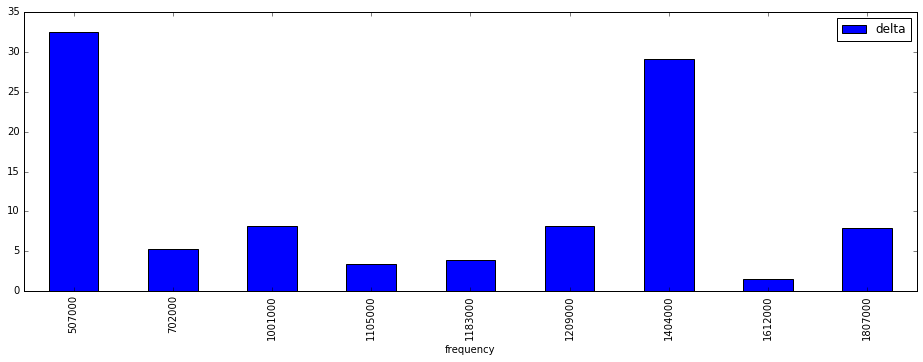

In [281]:
# Plot residency time
fig, axes = plt.subplots(1, 1, figsize=(16, 5));
df.plot(kind='bar', ax=axes)